In [2]:
library(tree)
library(ISLR)
library(tidyverse)
library(ggpubr)
library(ggalt)
library(ggh4x)

In [3]:
substract = function(refdat){
    nlist = c()
    for (r in c(1:nrow(refdat))){
        if (refdat[r,10] == 'A'){
            baf = refdat[r,3]/refdat[r,7]
        } else if (refdat[r,10] == 'C') {
            baf = refdat[r,4]/refdat[r,7]
        } else if (refdat[r,10] == 'G') {
            baf = refdat[r,5]/refdat[r,7]
        } else if (refdat[r,10] == 'T'){
            baf = refdat[r,6]/refdat[r,7]
        }
        nlist = c(nlist, baf)
    }
    refdat['BAF'] = nlist
    refdat['Nsum'] = refdat[,7]
    return (refdat)
}

In [5]:
cnvplotNsum = function(dat, chromdat, filename, ymax){
    ### dat:input data, chromdat: chromsize file, filename: output file name, 
    
    vline = chromdat$Mid
    newchr1 = dat %>% left_join(chromdat, by="chr") %>% mutate(newpos=pos+fend)
    mygroup = chromdat$chr
    chr_label = str_replace(chromdat$chr, "chr", "")
    
    ### adding chromosome labels
    start = chromdat %>% filter(fchrpos == 0) %>% pull(fchrpos)
    xlabpos = c()
    for (x in c(1:length(mygroup))){
        cchr = mygroup[x]
        cy = chromdat %>% filter(chr == cchr) %>% pull(fchrpos)
        py = chromdat %>% filter(chr == cchr) %>% pull(fend)
        mpos = py + cy/2
        xlabpos = c(xlabpos, mpos)
    }
    
    ### adding breaks and labels
    labels = c()
    breaks = c()
    minor_breaks = c()
    for (g in chromdat$chr){
        value1 = seq(0, chromdat[chromdat['chr']==g][2], 10000000)/1000000
        for (y in value1){
            if (y %% 30 == 0){
                labels = c(labels, y)
            } else {
                labels = c(labels, ' ')
            }
        }
        chromx = chromdat %>% filter(chr == g) %>% pull(fend)
        value2 = seq(0, chromdat[chromdat['chr']==g][2], 10000000) + chromx
        breaks = c(breaks, value2)
        value3 = seq(0, chromdat[chromdat['chr']==g][2], 5000000) + chromx
        minor_breaks = c(minor_breaks, value3)
    }

    ### plotting the figure
    options(repr.plot.width=160, repr.plot.height=4)

    fig1 = ggplot(newchr1, aes(x=newpos, y=Nsum, colour=color)) + geom_point(size=1,show.legend = FALSE) + 
        ylim(0,ymax)+ geom_vline(xintercept = vline, colour="red", size=0.2) + 
        scale_x_continuous(expand = c(0, 0),breaks=breaks, labels=labels,
                          minor_breaks = minor_breaks) + guides(x = "axis_minor") + 
        theme_bw(base_size = 18) + ggtitle(filename) + 
        theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
              plot.title = element_text(hjust = 0.5),panel.grid = element_blank(),
              panel.border = element_blank(),axis.line = element_line(colour = "black"),
              panel.background = element_blank(),axis.text.x = element_text(angle = 0)) +
        xlab("")+scale_color_manual(values = c("#fdae6b","#3182bd")) + ylab("")
    
    return (fig1)
}

In [6]:
cnvplotBAF = function(dat, chromdat, filename, ymax){
    ### dat:input data, chromdat: chromsize file, filename: output file name, 
    
    vline = chromdat$Mid
    newchr1 = dat %>% left_join(chromdat, by="chr") %>% mutate(newpos=pos+fend)
    mygroup = chromdat$chr
    chr_label = str_replace(chromdat$chr, "chr", "")
    
    ### adding chromosome labels
    start = chromdat %>% filter(fchrpos == 0) %>% pull(fchrpos)
    xlabpos = c()
    for (x in c(1:length(mygroup))){
        cchr = mygroup[x]
        cy = chromdat %>% filter(chr == cchr) %>% pull(fchrpos)
        py = chromdat %>% filter(chr == cchr) %>% pull(fend)
        mpos = py + cy/2
        xlabpos = c(xlabpos, mpos)
    }
    
    ### adding breaks and labels
    labels = c()
    breaks = c()
    minor_breaks = c()
    for (g in chromdat$chr){
        value1 = seq(0, chromdat[chromdat['chr']==g][2], 10000000)/1000000
        for (y in value1){
            if (y %% 30 == 0){
                labels = c(labels, y)
            } else {
                labels = c(labels, ' ')
            }
        }
        chromx = chromdat %>% filter(chr == g) %>% pull(fend)
        value2 = seq(0, chromdat[chromdat['chr']==g][2], 10000000) + chromx
        breaks = c(breaks, value2)
        value3 = seq(0, chromdat[chromdat['chr']==g][2], 5000000) + chromx
        minor_breaks = c(minor_breaks, value3)
    }

    ### plotting the figure
    options(repr.plot.width=160, repr.plot.height=4)

    fig2 = ggplot(newchr1, aes(x=newpos, y=BAF, colour=color)) + geom_point(size=1,show.legend = FALSE) + 
#        geom_point(aes(x=newpos, y=MinF, colour=color),size=1,show.legend = FALSE) +
        theme_bw(base_size = 18) + geom_vline(xintercept = vline, colour="red", size=0.2) + 
        scale_x_continuous(expand = c(0, 0),breaks=breaks, labels=labels,
                          minor_breaks = minor_breaks) + guides(x = "axis_minor")+
        scale_y_continuous(breaks = seq(0,1,0.2),labels=seq(0,1,0.2)) + 
        theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
              plot.title = element_text(hjust = 0.5),panel.grid = element_blank(),
                  panel.border = element_blank(),axis.line = element_line(colour = "black"),
                  panel.background = element_blank(),axis.text.x = element_text(angle = 0)) +
        annotate(geom = "text", x = xlabpos, y=1.2, label = chr_label, size = 10)+xlab("")+
        scale_color_manual(values = c("black","black")) + ylab("")

    return (fig2)
}

In [8]:
ref = read.table("../Xiaotu_Request/COGRelapse/SNPs_7590_gnomad_V2_1.tsv",sep='\t',head=T)
ref1 = ref %>% mutate(newID = paste(paste("chr",CHROM,sep=""),POS,sep="_")) %>% select(newID, REF, ALT)
head(ref1)

,newID,REF,ALT
,<chr>,<chr>,<chr>
1,chr1_998582,G,C
2,chr1_1098421,C,T
3,chr1_1646371,G,T
4,chr1_2112676,A,G
5,chr1_2800354,G,T
6,chr1_3385256,A,G


In [ ]:
mfold = list.files("merged_count_test/")
for (m in mfold){
    input = paste("merged_count_test/", m, sep='')
    sample = strsplit(m, '_')[[1]][1]
    data = read.table(input, head=TRUE, sep='\t')
    numcol = (ncol(data)-2)/5
    figlist = list()
    for (n in c(1:numcol)){
        subcol = c(1,2,(3+5*(n-1)):(2+(5*n)))
        subdat = data[,subcol]
        subdat1 = subdat %>% mutate(newID = paste(chr,pos,sep="_"))
        subdat2 = subdat1 %>% left_join(ref1, by="newID")
        name = strsplit(colnames(subdat)[3], "_")[[1]][1]

        tdat = substract(subdat2)
        x = sort(tdat[,7])
        value = as.integer(length(x)*0.95)
        max_y = x[value]

        figlist[[n]] = cnvplot(tdat, chromsize, name, max_y)
    }
    width = 40
    height = 8*numcol
    filename = paste(sample, ".png", sep="")
    outfig = ggarrange(plotlist=figlist, nrow=numcol, heights=height, widths=width)
    ggsave(filename, plot=outfig, height=height, width=width, dpi=50)   
}

In [66]:
fullchrom = c()
for (x in c(1:22)){
    fullchrom = c(fullchrom, paste("chr",as.character(x),sep=''))
}
fullchrom = c(fullchrom, "chrX")
fullchrom

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22" "chrX"

In [104]:
organizepos = function(mdat, mchr, mchromdat){
    
    x1 = mdat %>% filter(var == 'pos') %>% pull(splits)
    poslist = str_replace(x1[,1],'<','')
    leaflist = mdat %>% filter(var == '<leaf>') %>% pull(yval)
    poslist = c(1, poslist)
    chromend = mchromdat %>% filter(chr == mchr) %>% pull(chrpos)
    poslist = c(poslist, chromend)
    plist = poslist[order(as.double(poslist))]

    start = c()
    stop = c()
    value = c()
    for (r in c(1:length(leaflist))){
        start = c(start, plist[r])
        stop = c(stop, plist[r+1])
        value = c(value, leaflist[r])
    }
    mdat1 = data.frame(mchr, start, stop, value)
    return (mdat1)
}

In [141]:
# read chromosome information
chromsize = read.table("hg19.chrom.sizes1.txt",head=TRUE, sep='\t')

mfold = list.files("../Xiaotu_Request/COGRelapse/merged_count_test/")
for (m in mfold){
    input = paste("../Xiaotu_Request/COGRelapse/merged_count_test/", m, sep='')
    sample = strsplit(m, '_')[[1]][1]
    data = read.table(input, head=TRUE, sep='\t')
    numcol = (ncol(data)-2)/5
    
    figlist = list()
    
    for (n in c(1:numcol)){
        subcol = c(1,2,(3+5*(n-1)):(2+(5*n)))
        subdat = data[,subcol]
        name = strsplit(colnames(subdat)[3], "_")[[1]][1]
        subdat1 = subdat %>% mutate(newID = paste(chr,pos,sep="_"))
        subdat2 = subdat1 %>% left_join(ref1, by="newID")

        tdat = substract(subdat2)

        x = sort(tdat[,7])
        value = as.integer(length(x)*0.95)
        max_y = x[value]

        # generating original plot
        fig = cnvplotNsum(tdat, chromsize, name, max_y)

        # generating segmentation regions
        region = data.frame()

        for (chrom in fullchrom){

            # performing tree regression function for each individual chromosome
            tdat1 = tdat %>% filter(chr == chrom)

            # tree regression
            t1 = tree(Nsum ~ pos, data=tdat1)

            # appending segmented regions
            odat = organizepos(t1$frame, chrom, chromsize)
            region = rbind(region, odat)
        }
        region$start = as.integer(as.character(region$start))
        region$stop = as.integer(as.character(region$stop))

        colnames(region)[1] = 'chr'
        region1 = region %>% left_join(chromsize, by="chr") %>% 
                            mutate(newstart = start + fend,
                                    newstop = stop + fend) %>%
                 select(chr, newstart, newstop, value)
        
        color = c()
        for (i in c(1:nrow(region1))){
            if (i %% 2 == 0){
                color = c(color, "red")
            } else {
                color = c(color, "purple")
            }
        }
        print (nrow(region1))
        print (length(color))
        region1['color'] = color

        # plotting segmentation regions
        figlist[[n]] = fig + geom_segment(
            data=tibble(), 
            aes(x=region1$newstart,
               y=region1$value,
               xend=region1$newstop,
               yend=region1$value
            ), size=2, colour = "red", inherit.aes=FALSE)
    }
    width = 40
    height = 4*numcol
    filename = paste(sample, ".png", sep="")
    outfig = ggarrange(plotlist=figlist, nrow=numcol, heights=height, widths=width)
    ggsave(filename, plot=outfig, height=height, width=width, dpi=100)
}

[1] 114
[1] 114
[1] 124
[1] 124
[1] 146
[1] 146


Warning message:
“Removed 352 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_segment).”
Warning message:
“Removed 340 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_segment).”
Warning message:
“Removed 347 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_segment).”


[1] 128
[1] 128
[1] 140
[1] 140
[1] 141
[1] 141


Warning message:
“Removed 361 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 360 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_segment).”
Warning message:
“Removed 376 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_segment).”


In [118]:
figlist[[n]] = fig + geom_segment(
            data=tibble(), 
            aes(x=region1$newstart,
               y=region1$value,
               xend=region1$newstop,
               yend=region1$value
            ), size=2, colour = region1$color, inherit.aes=FALSE)

In [105]:
# read merged genotype data
sample = read.table("SJALL011121_merged.txt",head=T,sep='\t')
subdat = sample[,c(1:7)]
name = strsplit(colnames(subdat)[3], "_")[[1]][1]

subdat1 = subdat %>% mutate(newID = paste(chr,pos,sep="_"))
subdat2 = subdat1 %>% left_join(ref1, by="newID")

tdat = substract(subdat2)

x = sort(tdat[,7])
value = as.integer(length(x)*0.95)
max_y = x[value]

# generating original plot
fig = cnvplotNsum(tdat, chromsize, name, max_y)

# generating segmentation regions
region = data.frame()

for (chrom in fullchrom){

    # performing tree regression function for each individual chromosome
    tdat1 = tdat %>% filter(chr == chrom)
    
    # tree regression
    t1 = tree(Nsum ~ pos, data=tdat1)
    
    # appending segmented regions
    odat = organizepos(t1$frame, chrom, chromsize)
    region = rbind(region, odat)
}
region$start = as.integer(as.character(region$start))
region$stop = as.integer(as.character(region$stop))

colnames(region)[1] = 'chr'
region1 = region %>% left_join(chromsize, by="chr") %>% mutate(newstart = start + fend,
                                                              newstop = stop + fend) %>%
    select(chr, newstart, newstop, value)
color = rep(c("red","purple"),nrow(region1)/2)
region1['color'] = color

# plotting segmentation regions
figx = fig + geom_segment(
    data=tibble(), 
    aes(x=region1$newstart,
       y=region1$value,
       xend=region1$newstop,
       yend=region1$value
    ), size=2, colour = region1$color, inherit.aes=FALSE)

height = 4
width = 40
ggsave("test_full.png", plot=figx, height=height, width=width, dpi=50)

,mchr,start,stop,value
,<chr>,<int>,<int>,<dbl>
1,chr1,1,4455250,49.12500
2,chr1,4455250,6122360,38.21429
3,chr1,6122360,6597990,47.83333
4,chr1,6597990,249250621,35.23200
5,chr2,1,243199373,34.86583
6,chr3,1,4371110,41.12500


,chr,chrpos,fchrpos,fend,rstart,rend,Mid,color
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,249250621,257250621,0,0,257250621,253250621,Odd
2,chr2,243199373,251199373,257250621,257250621,508449994,504449994,Even
3,chr3,198022430,206022430,508449994,508449994,714472424,710472424,Odd
4,chr4,191154276,199154276,714472424,714472424,913626700,909626700,Even
5,chr5,180915260,188915260,913626700,913626700,1102541960,1098541960,Odd
6,chr6,171115067,179115067,1102541960,1102541960,1281657027,1277657027,Even


,chr,newstart,newstop,value,color
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,1,4455250,49.12500,red
2,chr1,4455250,6122360,38.21429,purple
3,chr1,6122360,6597990,47.83333,red
4,chr1,6597990,249250621,35.23200,purple
5,chr2,257250622,500449994,34.86583,red
6,chr3,508449995,512821104,41.12500,purple


Warning message:
“Removed 352 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_segment).”


In [61]:
sample = read.table("SJALL011121_merged.txt",head=T,sep='\t')
subdat = sample[,c(1:7)]
subdat1 = subdat %>% mutate(newID = paste(chr,pos,sep="_"))
subdat2 = subdat1 %>% left_join(ref1, by="newID")
tdat = substract(subdat2)
tdat1 = tdat %>% filter(chr == "chr9")

chromsize = read.table("hg19.chrom.sizes1.txt",head=TRUE, sep='\t')
head(chromsize)

,chr,chrpos,fchrpos,fend,rstart,rend,Mid,color
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,249250621,257250621,0,0,257250621,253250621,Odd
2,chr2,243199373,251199373,257250621,257250621,508449994,504449994,Even
3,chr3,198022430,206022430,508449994,508449994,714472424,710472424,Odd
4,chr4,191154276,199154276,714472424,714472424,913626700,909626700,Even
5,chr5,180915260,188915260,913626700,913626700,1102541960,1098541960,Odd
6,chr6,171115067,179115067,1102541960,1102541960,1281657027,1277657027,Even


In [14]:
t1 = tree(Nsum ~ pos, data=tdat1)
summary(t1)
t1$frame


Regression tree:
tree(formula = Nsum ~ pos, data = tdat1)
Number of terminal nodes:  5 
Residual mean deviance:  57 = 26340 / 462 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-23.1100  -4.8570  -0.1107   0.0000   5.1730  23.8900 

,var,n,dev,yval,splits
,<fct>,<dbl>,<dbl>,<dbl>,"<chr[,2]>"
1,pos,467,31889.559,35.23340,"<2.42805e+07, >2.42805e+07"
2,pos,177,12596.079,33.19774,"<2.17937e+07, >2.17937e+07"
4,<leaf>,133,6895.023,34.82707,","
5,pos,44,4280.727,28.27273,"<2.24655e+07, >2.24655e+07"
10,<leaf>,16,878.000,18.50000,","
11,<leaf>,28,1001.429,33.85714,","
3,pos,290,18112.331,36.47586,"<1.39119e+08, >1.39119e+08"
6,<leaf>,271,16498.679,36.11070,","
7,<leaf>,19,1062.105,41.68421,","


In [62]:
x1 = x %>% filter(var == 'pos') %>% pull(splits)
poslist = str_replace(x1[,1],'<','')
leaflist = x %>% filter(var == '<leaf>') %>% pull(yval)
poslist = c(1, poslist)
chromend = chromsize %>% filter(chr == 'chr9') %>% pull(fchrpos)
poslist = c(poslist, chromend)
plist = poslist[order(as.double(poslist))]

start = c()
stop = c()
value = c()
for (r in c(1:length(leaflist))){
    start = c(start, plist[r])
    stop = c(stop, plist[r+1])
    value = c(value, leaflist[r])
}
data.frame(start, stop, value)

start,stop,value
<chr>,<chr>,<dbl>
1,2.17937e+07,34.82707
2.17937e+07,2.24655e+07,18.50000
2.24655e+07,2.42805e+07,33.85714
2.42805e+07,1.39119e+08,36.11070
1.39119e+08,149213431,41.68421


,var,n,dev,yval,splits
,<fct>,<dbl>,<dbl>,<dbl>,"<chr[,2]>"
1,pos,528,31749.6648,35.66477,"<6.59799e+06, >6.59799e+06"
2,pos,28,2534.6786,43.39286,"<4.45525e+06, >4.45525e+06"
4,<leaf>,8,544.8750,49.12500,","
5,pos,20,1621.8000,41.10000,"<6.12236e+06, >6.12236e+06"
10,<leaf>,14,830.3571,38.21429,","
11,<leaf>,6,402.8333,47.83333,","
3,<leaf>,500,27449.0880,35.23200,","


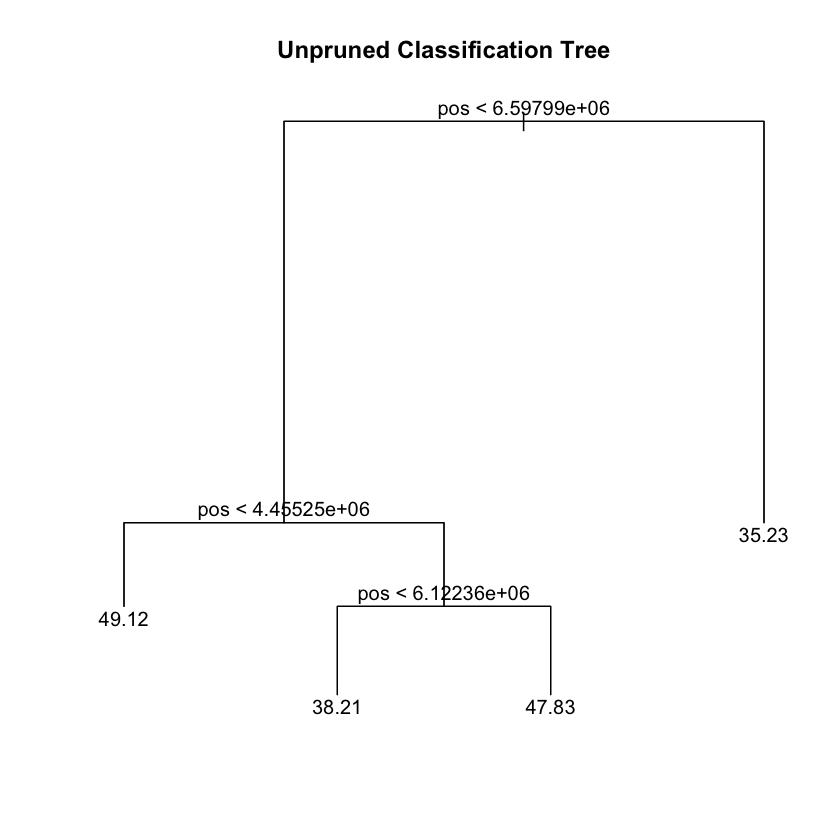

In [72]:
plot(t1)
text(t1, pretty = 0)
title(main = "Unpruned Classification Tree")
t1$frame